<img src="http://universidadcucii.mx/img/demos/law-firm/logo.png" width="150">

# Universidad CUCII 
## Estadística para la Educación

### Sesión 06/05 (Sábado 2018-07-07)

#### 1. Graficación más avanzada aún: el poderosísimo ggplot2
Con este paquete podemos hacer gráficos muy complejos y extraer información muy útil de nuestros datos desde su graficación. Para su instalación hay que correr el comando:

In [3]:
install.packages("ggplot2") #procura tener una buena conexión a Internet

Installing package into ‘/home/ani/R/x86_64-pc-linux-gnu-library/3.4’
(as ‘lib’ is unspecified)


In [4]:
#una vez concluída la instalación procedemos a cargar el paquete
library(ggplot2)

Copiamos el archivo modificado del Profr. Fabián *Totales_modif.csv* en la ruta que indica el comando:

In [5]:
getwd()

[1] "/home/ani/Dropbox/sonora/CUCII-StatsEdu"

Que en caso de que aún seas esclavo del windox, te marcará algo como *Documents* o *Mis Documentos* dependiendo de la versión que padezcas.

In [6]:
#leamos pues el archivo asignándolo a una variable
d <- read.csv("Totales_modif.csv")
str(d)

'data.frame':	81 obs. of  7 variables:
 $ grupo         : num  2.1 2.1 2.1 2.1 2.1 2.1 2.1 2.1 2.1 2.1 ...
 $ mat           : int  9737 9628 7801 7529 6137 6079 9957 12522 7387 9761 ...
 $ nombrecompleto: Factor w/ 81 levels "ALVAREZ SÁNCHEZ KEVIN ALEXIS",..: 1 3 30 31 37 40 41 43 46 48 ...
 $ sexo          : Factor w/ 2 levels "F","M": 2 2 2 1 1 2 2 2 2 2 ...
 $ promedio      : num  8.5 8.3 6.4 10 9.7 9.4 8.5 10 7.2 8.4 ...
 $ demeritos     : int  0 80 0 0 0 5 0 90 0 55 ...
 $ faltas        : int  7 11 3 2 0 7 3 3 6 4 ...


Vemos que es necesario corregir:
- grupo a factor
- nombrecompleto a caracter


In [7]:
d$grupo <- as.factor(d$grupo)
d$nombrecompleto <- as.character(d$nombrecompleto)
str(d)

'data.frame':	81 obs. of  7 variables:
 $ grupo         : Factor w/ 4 levels "2.1","2.2","2.3",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ mat           : int  9737 9628 7801 7529 6137 6079 9957 12522 7387 9761 ...
 $ nombrecompleto: chr  "ALVAREZ SÁNCHEZ KEVIN ALEXIS" "ARROYO RUBIO IÑAKI IAN" "GUZMÁN ESPINOZA IVAN" "HERNÁNDEZ GRANADOS YESENIA ESMERALDA" ...
 $ sexo          : Factor w/ 2 levels "F","M": 2 2 2 1 1 2 2 2 2 2 ...
 $ promedio      : num  8.5 8.3 6.4 10 9.7 9.4 8.5 10 7.2 8.4 ...
 $ demeritos     : int  0 80 0 0 0 5 0 90 0 55 ...
 $ faltas        : int  7 11 3 2 0 7 3 3 6 4 ...


#### 2. Alumnos por grupo

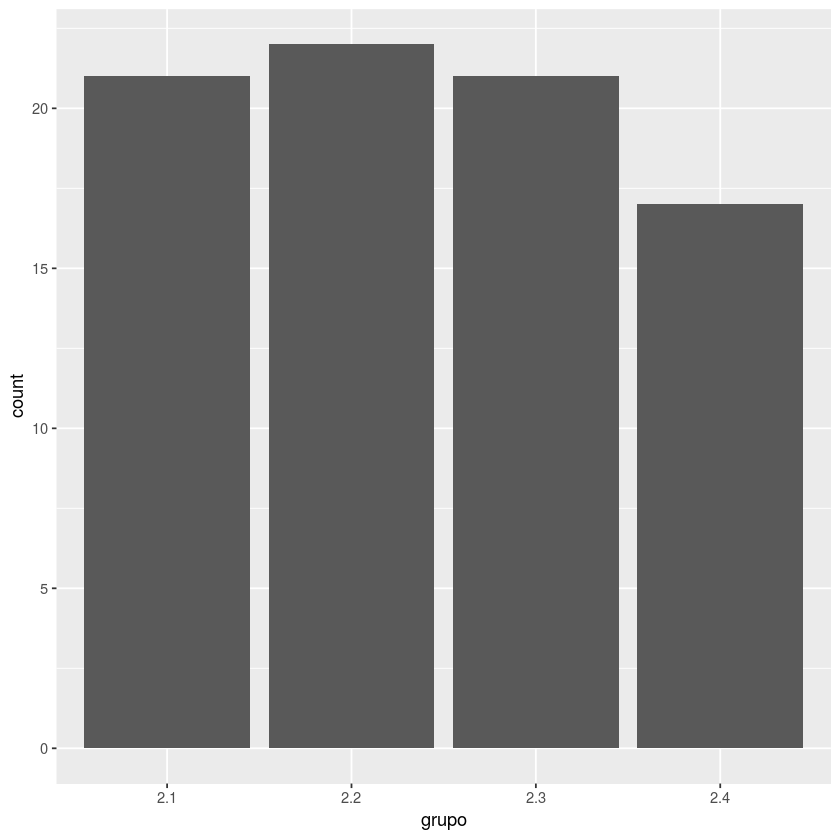

In [10]:
#una primera gráfica simple con ggplot
#veamos que su sintáxis es distinta de la graficación habitual
#gráficaPrincipal + atributo1 + atributo2 + ... etc
ggplot(data = d, aes(x = grupo))+geom_bar()

#### 3. Número de alumnos por grupo, indicando sexo

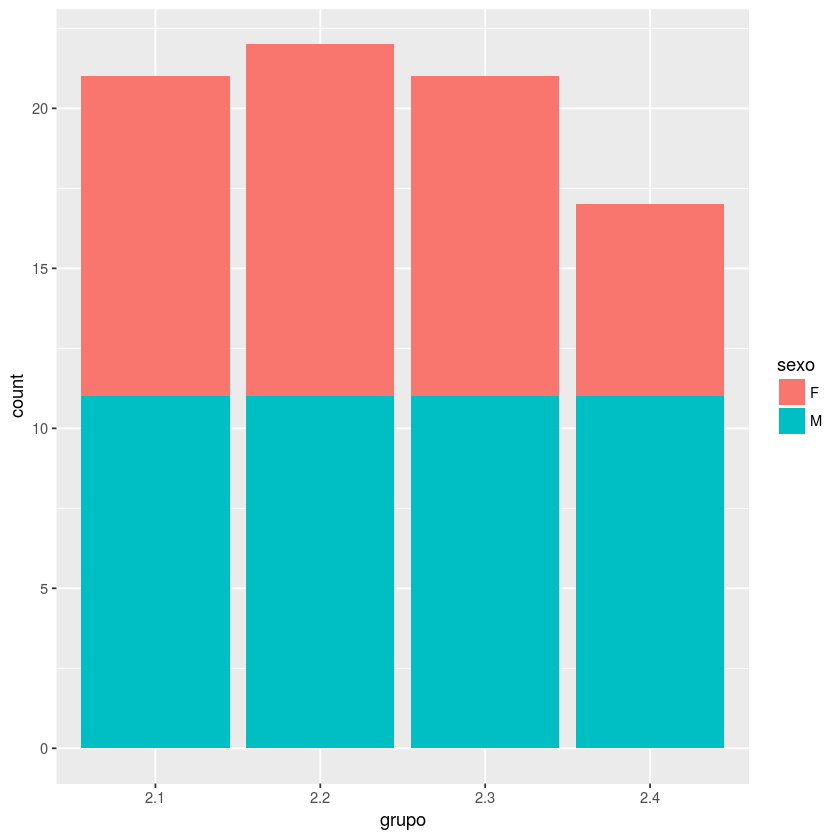

In [9]:
ggplot(data = d, aes(x = grupo, fill=sexo))+geom_bar()

#### 4. Promedios por grupo.

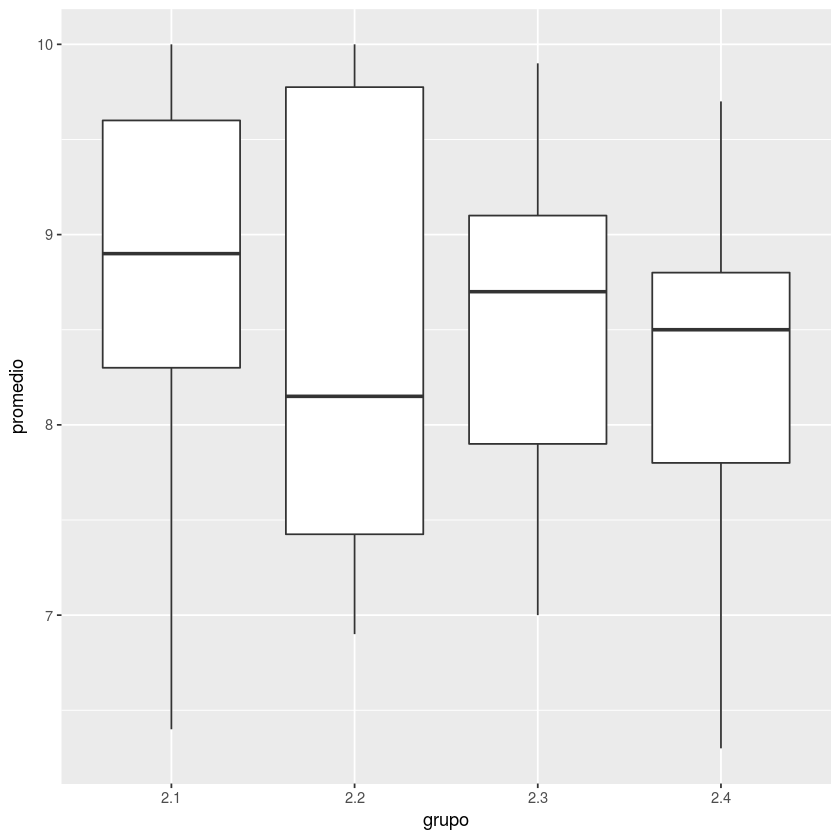

In [12]:
#ahora no basta con barplot porque se tiene más de una variable, por lo que la geometría es de boxplot
ggplot(data = d, aes(x = grupo, y=promedio))+geom_boxplot()

#### 5. Promedios por grupo, indicando sexo. 

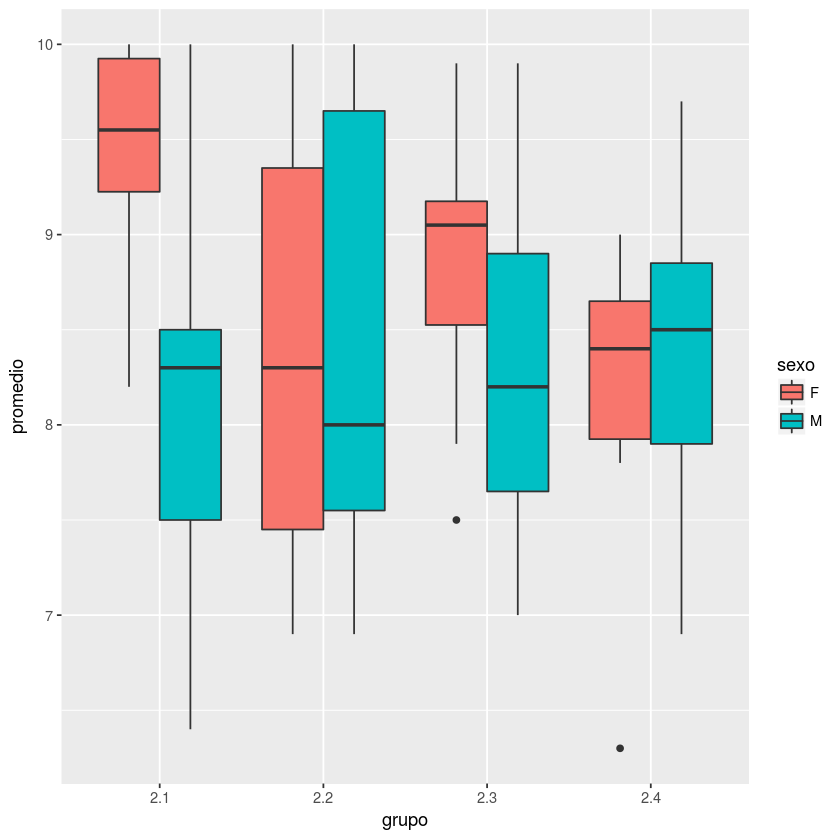

In [14]:
ggplot(data = d, aes(x = grupo, y=promedio, fill=sexo))+geom_boxplot()

Es de enfatizar la diferencia en aprovechamiento entre niñas y varones del grupo 2.1. Sin esta gráfica diferenciada por sexo, no habíamos podido acceder al conocimiento de esta característica en dicho grupo.

#### 5. Deméritos por grupo, indicando el sexo.

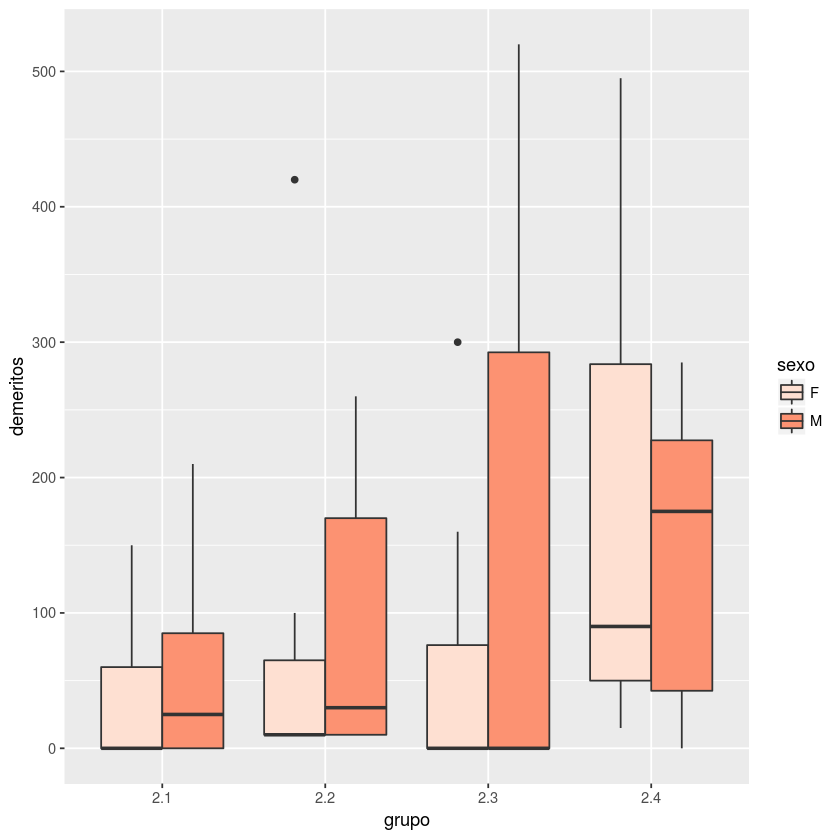

In [19]:
#podemos también modificar un tanto la paleta de colores
ggplot(data = d, aes(x = grupo, y=demeritos, fill=sexo))+geom_boxplot()+scale_fill_brewer(palette = "Reds")

Es de notarse la mala conducta de las niñas en el grupo 2.4; sin esta gráfica diferenciada por sexo, no nos hubiéramos dado cuenta de esta característica.

####  6. Correlación en modelos lineales

A veces, más que hacer conteos o medidas de tendiencia central de variables, queremos comparar el comportamiento de dos variables contínuas (no tipo etiqueta o factor, sino con decimales). Es decir, ver si una crece al mismo ritmo de otra. O en su caso, a contrarritmo.

In [20]:
#Utilicemos algunos datos preinstalados en R
data("cars")
head(cars)

speed,dist
4,2
4,10
7,4
7,22
8,16
9,10


El conjunto de datos *cars* tiene 2 columnas, que se refieren a la velocidad de un auto y su distancia de frenado hasta detenerse. Es lógico que a mayor velocidad, pues mayor distancia de frenado. Grafiquemos:

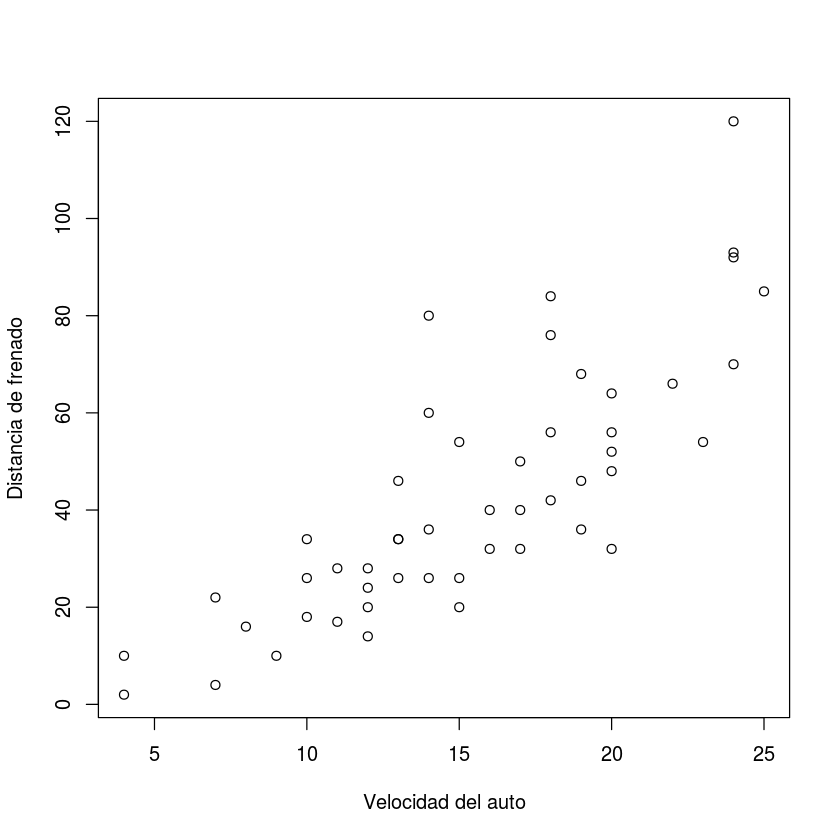

In [22]:
plot(cars$dist ~ cars$speed, xlab="Velocidad del auto", ylab="Distancia de frenado")

In [23]:
#construyamos entonces el modelo lineal
#la distancia de frenado explicado por la velocidad del auto, es decir:
modelo <- lm (cars$dist ~ cars$speed)
summary(modelo)


Call:
lm(formula = cars$dist ~ cars$speed)

Residuals:
    Min      1Q  Median      3Q     Max 
-29.069  -9.525  -2.272   9.215  43.201 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -17.5791     6.7584  -2.601   0.0123 *  
cars$speed    3.9324     0.4155   9.464 1.49e-12 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 15.38 on 48 degrees of freedom
Multiple R-squared:  0.6511,	Adjusted R-squared:  0.6438 
F-statistic: 89.57 on 1 and 48 DF,  p-value: 1.49e-12


Podemos afirmar con un 95% de confianza, que la distancia de frenado SÍ es explicada por la velocidad, pues el p-value es de 1.49e12, es decir, muy menor a 0.05 que representa el 5%. 

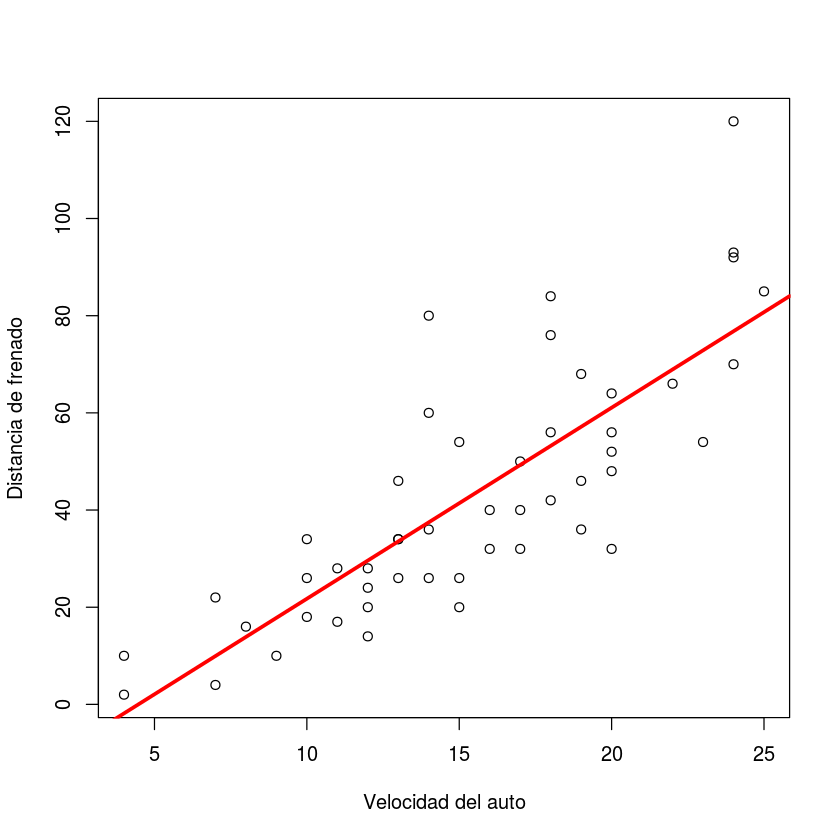

In [25]:
#como se muestra gráficamente también
#al agregar la línea de tendencia (modelo) a la gráfica original
plot(cars$dist ~ cars$speed, xlab="Velocidad del auto", ylab="Distancia de frenado")
abline(modelo, lwd=3, col="red")

#### 7. Correlación en modelo lineal aplicado a la Educación.

Tomando como ejemplo los datos *d* previamente cargados, podemos suponer: las faltas y el promedio están correlacionadas. Grafiquemos:

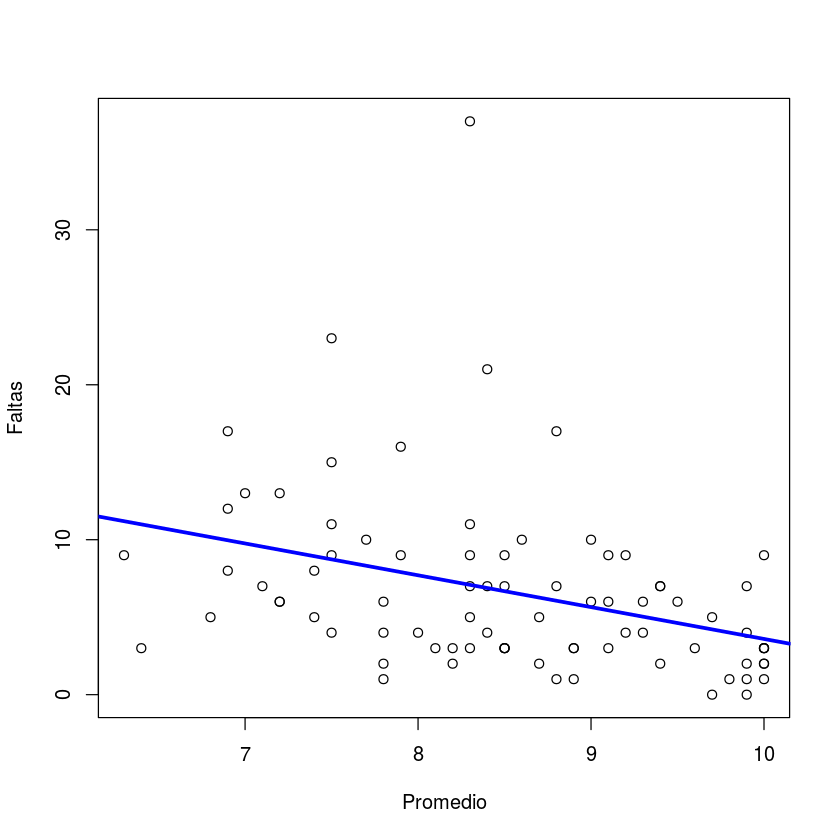

In [29]:
plot(d$faltas ~ d$promedio, xlab="Promedio", ylab="Faltas")
modelo2 <- lm(d$faltas ~ d$promedio)
abline(modelo2, lwd=3, col="blue")

In [28]:
summary(modelo2)


Call:
lm(formula = d$faltas ~ d$promedio)

Residuals:
   Min     1Q Median     3Q    Max 
-7.989 -3.346 -1.237  2.038 29.914 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  24.1351     5.2186   4.625 1.44e-05 ***
d$promedio   -2.0541     0.6082  -3.377  0.00114 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.444 on 79 degrees of freedom
Multiple R-squared:  0.1262,	Adjusted R-squared:  0.1151 
F-statistic: 11.41 on 1 and 79 DF,  p-value: 0.001139


Y como el p-value es de apenas 0.001 < 0.05; podemos tener el 95% de confianza estadística al afirmar que las faltas son explicadas por el promedio, es decir, quien tene mejor promedio suele tener menos faltas.

#### 8. Deméritos explicados por promedio.
Igualmente, sería razonable suponer que, entre peor sea la conducta, peor sea el promedio. Veamos:

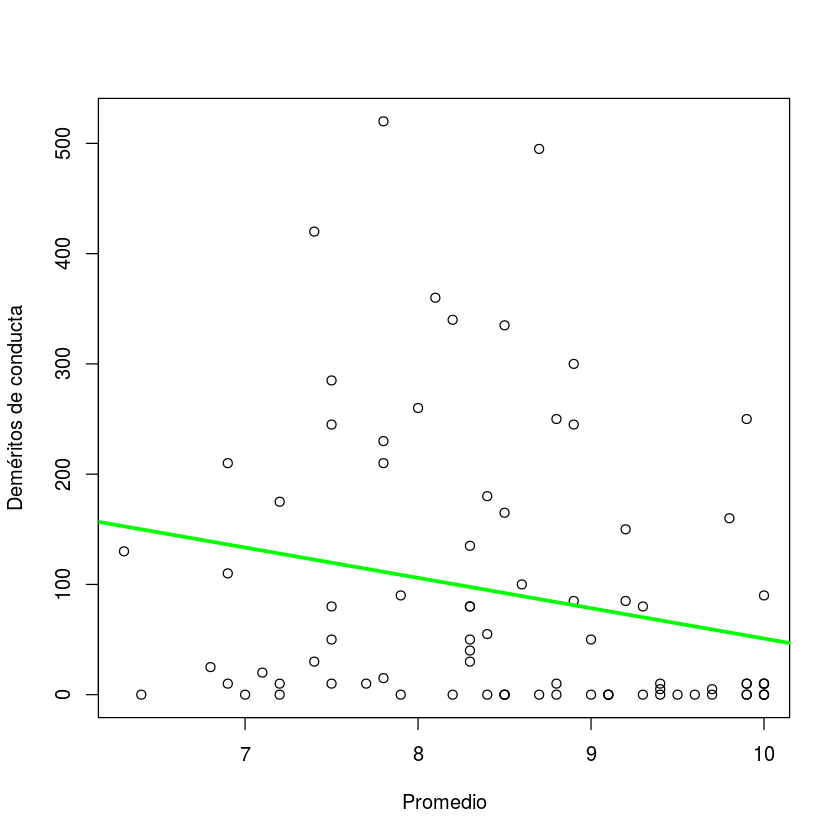

In [31]:
plot(d$demeritos ~ d$promedio, xlab="Promedio", ylab="Deméritos de conducta")
modelo3 <- lm(d$demeritos ~ d$promedio)
abline(modelo3, lwd=3, col="green")

In [32]:
summary(modelo3)


Call:
lm(formula = d$demeritos ~ d$promedio)

Residuals:
    Min      1Q  Median      3Q     Max 
-149.93  -75.65  -47.66   47.08  408.59 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)   326.01     118.30   2.756  0.00727 **
d$promedio    -27.51      13.79  -1.995  0.04944 * 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 123.4 on 79 degrees of freedom
Multiple R-squared:  0.04798,	Adjusted R-squared:  0.03593 
F-statistic: 3.982 on 1 and 79 DF,  p-value: 0.04944


Como apenas 0.049 < 0.05, también podemos afirmar, con el 95% de confianza estadística, que a mejor promedio, mejor conducta.